#IM2C 2025 Data Cleaning

## PDF Coding for Gathering NCACC Data

In [ ]:
!pip install pdfplumber
import pdfplumber
import pandas as pd

In [17]:
counties = ["Alamance", "Alexander", "Alleghany", "Anson", "Ashe", "Avery", "Beaufort", "Bertie", "Bladen", "Brunswick",
            "Buncombe", "Burke", "Cabarrus", "Caldwell", "Camden", "Carteret", "Caswell", "Catawba", "Chatham", "Cherokee",
            "Chowan", "Clay", "Cleveland", "Columbus", "Craven", "Cumberland", "Currituck", "Dare", "Davidson", "Davie",
            "Duplin", "Durham", "Edgecombe", "Forsyth", "Franklin", "Gaston", "Gates", "Graham", "Granville", "Greene",
            "Guilford", "Halifax", "Harnett", "Haywood", "Henderson", "Hertford", "Hoke", "Hyde", "Iredell", "Jackson",
            "Johnston", "Jones", "Lee", "Lenoir", "Lincoln", "Macon", "Madison", "Martin", "McDowell", "Mecklenburg",
            "Mitchell", "Montgomery", "Moore", "Nash", "New Hanover", "Northampton", "Onslow", "Orange", "Pamlico", "Pasquotank",
            "Pender", "Perquimans", "Person", "Pitt", "Polk", "Randolph", "Richmond", "Robeson", "Rockingham", "Rowan",
            "Rutherford", "Sampson", "Scotland", "Stanly", "Stokes", "Surry", "Swain", "Transylvania", "Tyrrell", "Union",
            "Vance", "Wake", "Warren", "Washington", "Watauga", "Wayne", "Wilkes", "Wilson", "Yadkin", "Yancey"]

len(counties)

100

### pdfplumber Approach

In [ ]:
def scrub(data):
  col = data.iloc[1]
  data = data[3:]
  data.columns = col
  return data

with pdfplumber.open("/content/2022 Ethnicity and Racial Data for NC by County.pdf") as pdf:

  # First dataframe from page 1
  table = pdf.pages[0].extract_table()
  df = pd.DataFrame(table)
  df = scrub(df)

  # Appending all other dataframes to page 1
  for page in pdf.pages[1:]:
    table = page.extract_table()
    new_df = pd.DataFrame(table)
    new_df = scrub(new_df)

    df = pd.concat([df, new_df], ignore_index = True)

df.columns = ['County', 'Population', 'Hispanic', 'Nonwhite', 'White', 'Black', 'American.Indian.Alaskan.Native', 'Asian', 'Native Hawaiian.Pacific Islander', 'Multirace']
df.drop(['Population', 'Nonwhite'], axis = 1, inplace = True)
df

,County,Hispanic,White,Black,American.Indian.Alaskan.Native,Asian,Native Hawaiian.Pacific Islander,Multirace
0,Alamance,"25,032","126,076","39,357","2,661","3,596",205,"4,458"
1,Alexander,"2,001","32,986","2,146",222,445,25,688
2,Alleghany,"1,125","10,598",232,81,89,5,180
3,Anson,"1,161","10,598","10,557",221,360,20,446
4,Ashe,"1,534","26,153",286,159,141,19,352
...,...,...,...,...,...,...,...,...
95,Wayne,"15,766","72,818","38,088","1,026","1,605",241,"3,508"
96,Wilkes,"4,869","60,702","3,110",316,409,108,"1,139"
97,Wilson,"9,348","43,400","31,684",637,983,122,"1,623"
98,Yadkin,"4,501","34,880","1,388",309,215,70,601


## Environmental Data
[source](https://resilience.climate.gov/datasets/FEMA::national-risk-index-counties/explore?filters=eyJTVEFURSI6WyJOb3J0aCBDYXJvbGluYSJdfQ%3D%3D&location=35.208369%2C-79.077628%2C6.63&showTable=true)

In [ ]:
envir = pd.read_csv("/content/National_Risk_Index_Counties_5362884162860110673.csv")
envir

,OBJECTID,National Risk Index ID,State Name,State Name Abbreviation,State FIPS Code,County Name,County Type,County FIPS Code,State-County FIPS Code,Population (2020),...,Winter Weather - Expected Annual Loss Rate - Population,Winter Weather - Expected Annual Loss Rate - Agriculture,Winter Weather - Expected Annual Loss Rate - National Percentile,Winter Weather - Hazard Type Risk Index Value,Winter Weather - Hazard Type Risk Index Score,Winter Weather - Hazard Type Risk Index Rating,National Risk Index Version,Shape__Area,Shape__Length,GlobalID
0,1892,C37001,North Carolina,NC,37,Alamance,County,1,37001,171316,...,2.707419e-07,0.000010,70.783039,736417.667494,95.227490,Relatively High,March 2023,1.723849e+09,179799.592858,a89d28c9-fdfa-4bd0-a92e-cd8f3388a255
1,1893,C37003,North Carolina,NC,37,Alexander,County,3,37003,36437,...,4.740191e-08,0.000006,25.874342,30644.402903,33.757556,Relatively Low,March 2023,1.043343e+09,145687.952172,57ecea76-a7eb-48bb-a5d9-a55e9d070d74
2,1894,C37005,North Carolina,NC,37,Alleghany,County,5,37005,10876,...,6.967635e-08,0.000008,33.704735,17196.365372,21.476297,Very Low,March 2023,9.486209e+08,164853.443413,530194e6-d80d-4e0c-b2f3-41fc4beec00d
3,1895,C37007,North Carolina,NC,37,Anson,County,7,37007,22036,...,2.936131e-07,0.000003,71.340142,118631.200876,68.055997,Relatively Moderate,March 2023,2.076598e+09,214476.444451,7fbc3deb-5d17-43ea-995a-65c0e32f5966
4,1896,C37009,North Carolina,NC,37,Ashe,County,9,37009,26560,...,1.249369e-07,0.000015,49.056020,47131.462723,44.225262,Relatively Low,March 2023,1.721498e+09,196441.756132,06ed1e2e-c9f2-4a82-98e2-1ad61d12089a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1987,C37191,North Carolina,NC,37,Wayne,County,191,37191,116680,...,1.607530e-07,0.000006,55.834107,303859.120072,86.382437,Relatively High,March 2023,2.176940e+09,216953.880546,8a8292f1-e306-40b6-89d1-eb73c81c3e75
96,1988,C37193,North Carolina,NC,37,Wilkes,County,193,37193,65928,...,5.045639e-08,0.000006,27.824203,68068.002283,53.324849,Relatively Low,March 2023,3.014807e+09,273196.940814,02a70fdf-cd53-48d0-9cfb-85280440aec2
97,1989,C37195,North Carolina,NC,37,Wilson,County,195,37195,78695,...,1.607530e-07,0.000006,54.441349,256678.524045,83.741648,Relatively Moderate,March 2023,1.468665e+09,161757.527144,3b5b47dd-f5db-4673-ae3d-77f11dce3f6d
98,1990,C37197,North Carolina,NC,37,Yadkin,County,197,37197,37209,...,4.324739e-08,0.000005,23.150727,29162.027122,32.866688,Relatively Low,March 2023,1.344606e+09,170891.191326,2fc3988b-12dd-4ad8-9514-91c127e46bf9


In [ ]:
for i in envir.columns: print(i)

OBJECTID
National Risk Index ID
State Name
State Name Abbreviation
State FIPS Code
County Name
County Type
County FIPS Code
State-County FIPS Code
Population (2020)
Building Value ($)
Agriculture Value ($)
Area (sq mi)
National Risk Index - Value - Composite
National Risk Index - Score - Composite
National Risk Index - Rating - Composite
National Risk Index - State Percentile - Composite
Expected Annual Loss - Score - Composite
Expected Annual Loss - Rating - Composite
Expected Annual Loss - State Percentile - Composite
Expected Annual Loss - Total - Composite
Expected Annual Loss - Building Value - Composite
Expected Annual Loss - Population - Composite
Expected Annual Loss - Population Equivalence - Composite
Expected Annual Loss - Agriculture Value - Composite
Expected Annual Loss Rate - Building - Composite
Expected Annual Loss Rate - Population - Composite
Expected Annual Loss Rate - Agriculture - Composite
Expected Annual Loss Rate - National Percentile - Composite
Social Vulnera

In [ ]:
risk = envir[["County Name", "Area (sq mi)", "Community Resilience - Score",  "Coastal Flooding - Hazard Type Risk Index Score",
              "Riverine Flooding - Hazard Type Risk Index Score", "Hurricane - Hazard Type Risk Index Score",
              "Wildfire - Hazard Type Risk Index Score", "Building Value ($)"]].copy()
risk.fillna(0, inplace = True)
risk.describe()

,Area (sq mi),Community Resilience - Score,Coastal Flooding - Hazard Type Risk Index Score,Riverine Flooding - Hazard Type Risk Index Score,Hurricane - Hazard Type Risk Index Score,Wildfire - Hazard Type Risk Index Score,Building Value ($)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,543.618742,41.263400,13.140845,57.815781,77.986541,49.210945,2.007482e+10
std,257.231912,19.863816,23.569253,24.508832,16.466724,24.110856,3.214053e+10
min,223.010681,3.790000,0.000000,11.040407,30.058322,0.349984,1.018921e+09
25%,367.541656,26.305000,0.000000,38.275533,66.846119,32.659879,6.262984e+09
50%,492.055257,38.924999,0.000000,58.558702,81.987438,50.031817,9.983558e+09
75%,650.118212,53.582500,20.623742,79.239580,90.477793,66.584473,2.317717e+10
max,1557.298013,99.589996,85.311871,98.472797,99.371916,94.718422,2.152861e+11


In [ ]:
risk.columns = ["County", "Area.sq.mi", "Community.Resilience", "Coastal.Flooding.Risk.Index.Score", "Riverine.Flooding.Risk.Index.Score",
                "Hurricane.Risk.Index.Score", "Wildfire.Risk.Index.Score", "Building.Value"]
risk

,County,Area.sq.mi,Community.Resilience,Coastal.Flooding.Risk.Index.Score,Riverine.Flooding.Risk.Index.Score,Hurricane.Risk.Index.Score,Wildfire.Risk.Index.Score,Building.Value
0,Alamance,438.623870,52.230000,0.0,54.756602,82.817407,49.761374,28645737450
1,Alexander,266.293627,27.629999,0.0,14.858416,61.013908,47.629653,6490937927
2,Alleghany,238.643926,12.380000,0.0,33.662106,51.188874,8.017817,2988316569
3,Anson,542.521729,33.480000,0.0,60.292714,82.009870,41.457206,4935305480
4,Ashe,433.711907,37.939999,0.0,67.069679,56.707044,16.226535,6943408779
...,...,...,...,...,...,...,...,...
95,Wayne,563.352451,44.110001,0.0,98.472797,95.962315,47.056952,27174724199
96,Wilkes,763.961007,29.340000,0.0,72.414890,72.498878,54.852052,17168685902
97,Wilson,376.874732,51.270000,0.0,88.768692,89.816061,38.561884,16247367486
98,Yadkin,341.122199,31.730000,0.0,26.344257,62.404666,34.934776,6455069609


In [ ]:
merger = pd.merge(df, risk, how = 'inner', on = 'County')
merger

,County,Hispanic,White,Black,American.Indian.Alaskan.Native,Asian,Native Hawaiian.Pacific Islander,Multirace,Area.sq.mi,Community.Resilience,Coastal.Flooding.Risk.Index.Score,Riverine.Flooding.Risk.Index.Score,Hurricane.Risk.Index.Score,Wildfire.Risk.Index.Score,Building.Value
0,Alamance,"25,032","126,076","39,357","2,661","3,596",205,"4,458",438.623870,52.230000,0.0,54.756602,82.817407,49.761374,28645737450
1,Alexander,"2,001","32,986","2,146",222,445,25,688,266.293627,27.629999,0.0,14.858416,61.013908,47.629653,6490937927
2,Alleghany,"1,125","10,598",232,81,89,5,180,238.643926,12.380000,0.0,33.662106,51.188874,8.017817,2988316569
3,Anson,"1,161","10,598","10,557",221,360,20,446,542.521729,33.480000,0.0,60.292714,82.009870,41.457206,4935305480
4,Ashe,"1,534","26,153",286,159,141,19,352,433.711907,37.939999,0.0,67.069679,56.707044,16.226535,6943408779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wayne,"15,766","72,818","38,088","1,026","1,605",241,"3,508",563.352451,44.110001,0.0,98.472797,95.962315,47.056952,27174724199
96,Wilkes,"4,869","60,702","3,110",316,409,108,"1,139",763.961007,29.340000,0.0,72.414890,72.498878,54.852052,17168685902
97,Wilson,"9,348","43,400","31,684",637,983,122,"1,623",376.874732,51.270000,0.0,88.768692,89.816061,38.561884,16247367486
98,Yadkin,"4,501","34,880","1,388",309,215,70,601,341.122199,31.730000,0.0,26.344257,62.404666,34.934776,6455069609


## Transportation

In [ ]:
tran = pd.read_csv("/content/nc-transportation-linc.csv", sep = ';')
tran = tran[['Area Name', 'Variable', 'Value']].copy()
tran.columns = ['County', 'Variable', 'Value']

tran = tran.pivot(index = 'County', columns = 'Variable', values = 'Value')

tran['County'] = tran.index
tran['County'] = tran['County'].apply(lambda x: x.replace(' County', ''))
tran.columns = ['Auto.Truck.Registrations', 'Primary.Highway.Mileage', 'Secondary.Highway.Mileage', 'County']
tran = tran[['County', 'Auto.Truck.Registrations', 'Primary.Highway.Mileage', 'Secondary.Highway.Mileage']].copy()
tran.reset_index(drop = True, inplace = True)
tran

,County,Auto.Truck.Registrations,Primary.Highway.Mileage,Secondary.Highway.Mileage
0,Alamance,154556.0,157.40,810.18
1,Alexander,38858.0,56.19,530.37
2,Alleghany,13372.0,84.58,363.22
3,Anson,20571.0,125.82,682.47
4,Ashe,29925.0,118.71,673.52
...,...,...,...,...
96,Wayne,104564.0,220.46,919.86
97,Wilkes,70179.0,150.40,1165.24
98,Wilson,70549.0,177.69,577.67
99,Yadkin,41764.0,90.71,626.95


## Final Merge

In [ ]:
final_df = pd.read_csv("NC_County_2024_data.csv")
final_df = pd.merge(final_df, merger, how = 'inner', on = 'County')
final_df = pd.merge(final_df, tran, how = 'inner', on = 'County')
final_df

,County,Population,Population.Change.Since.2014,Median.Age,Population.Under.Age.18,Population.Aged.65.,Veteran.Population,Agricultural.Land,Percent.Change.in.Ag.Land.since.2017,Number.of.Farms,...,Area.sq.mi,Community.Resilience,Coastal.Flooding.Risk.Index.Score,Riverine.Flooding.Risk.Index.Score,Hurricane.Risk.Index.Score,Wildfire.Risk.Index.Score,Building.Value,Auto.Truck.Registrations,Primary.Highway.Mileage,Secondary.Highway.Mileage
0,Alamance,184114,28556,40.22,0.2051,0.1908,0.0514,68769,-0.1408,724,...,438.623870,52.230000,0.0,54.756602,82.817407,49.761374,28645737450,154556.0,157.40,810.18
1,Alexander,36464,-359,44.23,0.1844,0.2163,0.0535,50799,-0.0618,535,...,266.293627,27.629999,0.0,14.858416,61.013908,47.629653,6490937927,38858.0,56.19,530.37
2,Alleghany,11464,540,45.93,0.1675,0.2668,0.0725,63298,-0.1033,435,...,238.643926,12.380000,0.0,33.662106,51.188874,8.017817,2988316569,13372.0,84.58,363.22
3,Anson,22059,-3079,40.29,0.2108,0.1949,0.0633,84695,-0.0074,421,...,542.521729,33.480000,0.0,60.292714,82.009870,41.457206,4935305480,20571.0,125.82,682.47
4,Ashe,27196,514,48.34,0.1670,0.2710,0.0553,84498,-0.2304,760,...,433.711907,37.939999,0.0,67.069679,56.707044,16.226535,6943408779,29925.0,118.71,673.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wayne,117140,-4968,37.76,0.2449,0.1779,0.0909,149752,-0.0943,415,...,563.352451,44.110001,0.0,98.472797,95.962315,47.056952,27174724199,104564.0,220.46,919.86
96,Wilkes,66315,-1397,43.97,0.1936,0.2274,0.0529,114778,0.0756,871,...,763.961007,29.340000,0.0,72.414890,72.498878,54.852052,17168685902,70179.0,150.40,1165.24
97,Wilson,78355,-894,39.44,0.2215,0.1887,0.0621,126286,0.0272,207,...,376.874732,51.270000,0.0,88.768692,89.816061,38.561884,16247367486,70549.0,177.69,577.67
98,Yadkin,37511,40,43.22,0.1938,0.2134,0.0563,98329,0.1235,754,...,341.122199,31.730000,0.0,26.344257,62.404666,34.934776,6455069609,41764.0,90.71,626.95


In [ ]:
mountains = "Mountain counties of North Carolina. Alleghany, Ashe, Avery, Buncombe, Burke, Caldwell, Clay, Cherokee, Graham, Haywood, Henderson, Jackson, Macon, Madison, McDowell, Mitchell, Polk, Rutherford, Swain, Transylvania, Watauga, Wilkes, and Yancey"
mountains_list = []

piedmont = "Alamance, Alexander, Anson, Cabarrus, Caswell, Catawba, Chatham, Cleveland, Davidson, Davie, Durham, Forsyth, Franklin, Gaston, Granville, Guilford, Iredell, Lee, Lincoln, Mecklenburg, Montgomery, Moore, Orange, Person, Randolph, Richmond, Rockingham, Rowan, Stanly, Stokes, Surry, Union, Vance, Wake, Warren, and Yadkin"
piedmont_list = []

coastal = "Bertie, Beaufort, Brunswick, Camden, Carteret, Chowan, Craven, Currituck, Dare, Gates, Hertford, Hyde, New Hanover, Onslow, Pamlico, Pasquotank, Pender, Perquimans, Tyrrell, and WashingtonBladen, Columbus, Cumberland, Duplin, Edgecombe, Greene, Halifax, Harnett, Hoke, Johnston, Jones, Lenoir, Martin, Nash, Northampton, Pitt, Robeson, Sampson, Scotland, Wayne, and Wilson"
coastal_list = []


for county in counties:

  if county in mountains:
    mountains_list.append(1)
  else:
    mountains_list.append(0)

  if county in piedmont:
    piedmont_list.append(1)
  else:
    piedmont_list.append(0)

  if county in coastal:
    coastal_list.append(1)
  else:
    coastal_list.append(0)


final_df['Mountains'] = mountains_list
final_df['Piedmont'] = piedmont_list
final_df['Coastal'] = coastal_list

In [ ]:
final_df

,County,Population,Population.Change.Since.2014,Median.Age,Population.Under.Age.18,Population.Aged.65.,Veteran.Population,Agricultural.Land,Percent.Change.in.Ag.Land.since.2017,Number.of.Farms,...,Riverine.Flooding.Risk.Index.Score,Hurricane.Risk.Index.Score,Wildfire.Risk.Index.Score,Building.Value,Auto.Truck.Registrations,Primary.Highway.Mileage,Secondary.Highway.Mileage,Mountains,Piedmont,Coastal
0,Alamance,184114,28556,40.22,0.2051,0.1908,0.0514,68769,-0.1408,724,...,54.756602,82.817407,49.761374,28645737450,154556.0,157.40,810.18,0,1,0
1,Alexander,36464,-359,44.23,0.1844,0.2163,0.0535,50799,-0.0618,535,...,14.858416,61.013908,47.629653,6490937927,38858.0,56.19,530.37,0,1,0
2,Alleghany,11464,540,45.93,0.1675,0.2668,0.0725,63298,-0.1033,435,...,33.662106,51.188874,8.017817,2988316569,13372.0,84.58,363.22,1,0,0
3,Anson,22059,-3079,40.29,0.2108,0.1949,0.0633,84695,-0.0074,421,...,60.292714,82.009870,41.457206,4935305480,20571.0,125.82,682.47,0,1,0
4,Ashe,27196,514,48.34,0.1670,0.2710,0.0553,84498,-0.2304,760,...,67.069679,56.707044,16.226535,6943408779,29925.0,118.71,673.52,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wayne,117140,-4968,37.76,0.2449,0.1779,0.0909,149752,-0.0943,415,...,98.472797,95.962315,47.056952,27174724199,104564.0,220.46,919.86,0,0,1
96,Wilkes,66315,-1397,43.97,0.1936,0.2274,0.0529,114778,0.0756,871,...,72.414890,72.498878,54.852052,17168685902,70179.0,150.40,1165.24,1,0,0
97,Wilson,78355,-894,39.44,0.2215,0.1887,0.0621,126286,0.0272,207,...,88.768692,89.816061,38.561884,16247367486,70549.0,177.69,577.67,0,0,1
98,Yadkin,37511,40,43.22,0.1938,0.2134,0.0563,98329,0.1235,754,...,26.344257,62.404666,34.934776,6455069609,41764.0,90.71,626.95,0,1,0


In [ ]:
final_df.to_csv("Final2_NC_County_2024_data.csv", index = False)

## Alice's Amazing and Adaptive Boxplots

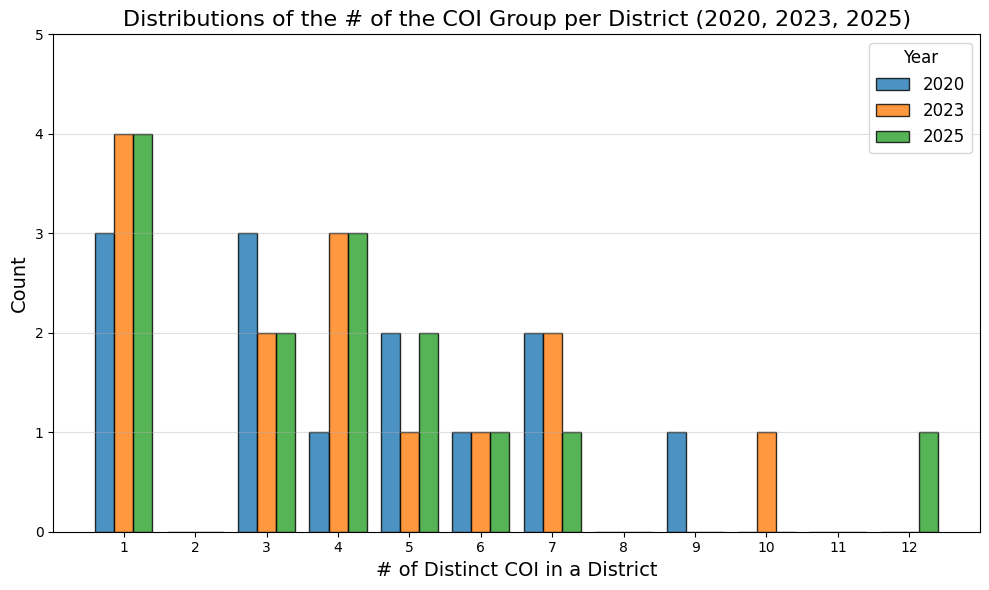

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('help - Sheet1.csv', header=None, names=['2020', '2023', '2025'])

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

data_2020 = df['2020'].dropna()
data_2023 = df['2023'].dropna()
data_2025 = df['2025'].dropna()

all_data = pd.concat([data_2020, data_2023, data_2025])
min_val = all_data.min()
max_val = all_data.max()

bins = np.arange(min_val - 0.5, max_val + 1.5, 1)
plt.figure(figsize=(10, 6))
plt.hist([data_2020, data_2023, data_2025], bins=bins,
        label=['2020', '2023', '2025'], edgecolor='black',
        align='mid', alpha = 0.8)

ax = plt.gca()
max_freq = ax.get_ylim()[1]
plt.yticks(np.arange(0, np.ceil(max_freq) + 1, 1))

plt.title('Distributions of the # of the COI Group per District (2020, 2023, 2025)', fontsize = 16)
plt.xlabel('# of Distinct COI in a District', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.xticks(np.arange(min_val, max_val + 1))
plt.legend(title='Year', fontsize=12, title_fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()

plt.show()

---

**EVERYTHING BELOW IS UNUSED CODE IN OUR FINAL PRODUCT**

---

# Voting Data By County

In [13]:
import pandas as pd

df = pd.read_csv("countypres_2000-2024.csv")
df = df[df['state_po'] == 'NC'].copy()
df.reset_index(drop = True, inplace = True)
df = df[['year', 'county_name', 'party', 'candidate', 'candidatevotes']].copy()

df = df.groupby(['year', 'county_name', 'party']).sum()
df = pd.DataFrame(df.to_records())
df = df[['year', 'county_name', 'party', 'candidatevotes']].copy()

df['county_name'] = df['county_name'].apply(lambda x: x.capitalize())
df['party'] = df['party'].apply(lambda x: x.capitalize())
df = df.replace('Mcdowell', 'McDowell').replace("New hanover", "New Hanover")
df.columns = ['Year', 'County', 'Party', 'Candidate.Votes']
df

,Year,County,Party,Candidate.Votes
0,2000,Alamance,Democrat,17459
1,2000,Alamance,Green,0
2,2000,Alamance,Other,327
3,2000,Alamance,Republican,29305
4,2000,Alexander,Democrat,4166
...,...,...,...,...
2495,2024,Yadkin,Republican,16439
2496,2024,Yancey,Democrat,3635
2497,2024,Yancey,Libertarian,38
2498,2024,Yancey,Other,101


In [14]:
temp = df[df['County'] == 'Cabarrus']
temp[temp['Party'] == 'Democrat']['Candidate.Votes'].iloc[0]

np.int64(16284)

In [15]:
political_split = {'dem': [], 'rep': []}

for county in df['County'].unique():
  current_df = df[df['County'] == county].copy()
  dem = sum(current_df[current_df['Party'] == 'Democrat']['Candidate.Votes'])
  rep = sum(current_df[current_df['Party'] == 'Republican']['Candidate.Votes'])

  political_split['dem'].append(dem / (dem + rep))
  political_split['rep'].append(rep / (dem + rep))

political_split

{'dem': [0.4332607080124308,
  0.2524890020838157,
  0.31484959847556826,
  0.569453994358924,
  0.3223383729929474,
  0.24211198410868523,
  0.3781055019852524,
  0.628680142687277,
  0.4721307994479244,
  0.38425270453586857,
  0.5669739481677323,
  0.34437382919793597,
  0.4096022119218265,
  0.2856308008230219,
  0.3029031767745858,
  0.297389316405054,
  0.453942401035487,
  0.3269581489108142,
  0.5420629434525938,
  0.2591139131926574,
  0.44819572382320627,
  0.2825083997793491,
  0.3672140834503524,
  0.4261315638046499,
  0.40072500432312647,
  0.5652254503349678,
  0.2939166506809898,
  0.41464956991459245,
  0.28237903064690134,
  0.27068845133361263,
  0.4127290260366442,
  0.7704118513731958,
  0.6455613813053698,
  0.5326351605248393,
  0.45247735882190615,
  0.35513310559296596,
  0.47989992608176496,
  0.25065511337828866,
  0.4912831381854414,
  0.43980238627889634,
  0.5791534197378988,
  0.6202413424130531,
  0.38506878811288814,
  0.40452101126602913,
  0.379829794

In [20]:
pol = pd.DataFrame(political_split)
pol['County'] = counties

temp = pd.read_csv("/content/Final2_NC_County_2024_data.csv")
pol['Population'] = temp['Population']

pol.to_csv('NC_politics.csv', index = False)

In [24]:
4.07/14

0.29071428571428576

In [22]:
(7+4+3+6+1+1+5+4+1+4+1+3+5+12)/14

4.071428571428571

In [38]:
political_split = {county: [] for county in counties}

for county in df['County'].unique():
  current_df = df[df['County'] == county].copy()
  dem = sum(current_df[current_df['Party'] == 'Democrat']['Candidate.Votes'])
  rep = sum(current_df[current_df['Party'] == 'Republican']['Candidate.Votes'])

  political_split[county].append(dem / (dem + rep))
  political_split[county].append(rep / (dem + rep))

political_split

{'Alamance': [0.4332607080124308, 0.5667392919875692],
 'Alexander': [0.2524890020838157, 0.7475109979161842],
 'Alleghany': [0.31484959847556826, 0.6851504015244317],
 'Anson': [0.569453994358924, 0.43054600564107603],
 'Ashe': [0.3223383729929474, 0.6776616270070526],
 'Avery': [0.24211198410868523, 0.7578880158913147],
 'Beaufort': [0.3781055019852524, 0.6218944980147476],
 'Bertie': [0.628680142687277, 0.37131985731272293],
 'Bladen': [0.4721307994479244, 0.5278692005520756],
 'Brunswick': [0.38425270453586857, 0.6157472954641314],
 'Buncombe': [0.5669739481677323, 0.4330260518322677],
 'Burke': [0.34437382919793597, 0.6556261708020641],
 'Cabarrus': [0.4096022119218265, 0.5903977880781734],
 'Caldwell': [0.2856308008230219, 0.7143691991769782],
 'Camden': [0.3029031767745858, 0.6970968232254142],
 'Carteret': [0.297389316405054, 0.702610683594946],
 'Caswell': [0.453942401035487, 0.546057598964513],
 'Catawba': [0.3269581489108142, 0.6730418510891858],
 'Chatham': [0.5420629434525

## Electoral predictions

In [56]:
# Cohen's D COIs
COI_1 = ["Cherokee", "Clay", "Macon", "Jackson", "Swain",
          "Graham"] + ["Granville", "Franklin", "Nash", "Wilson", "Wake",
          "Johnston"] + ["Avery", "Watauga", "Caldwell", "Burke"]
COI_2 = ["Ashe", "Alleghany", "Wilkes", "Surry", "Yadkin"]
COI_3 = ["Stokes", "Rockingham", "Forsyth", "Guilford"] + ["Cleveland", "Lincoln", "Gaston", "Catawba", "Alexander",
         "Iredell", "Davie", "Rowan", "Davidson", "Stanly", "Randolph",
         "Alamance"]
COI_4 = ["Mecklenburg"]
COI_5 = ["Cabarrus", "Union"]
COI_6 = ["Columbus", "Bladen", "Robeson", "Cumberland", "Hoke"] + ["Anson", "Richmond", "Montgomery",
         "Scotland"]
COI_7 = ["Person", "Caswell", "Durham", "Orange"]
COI_8 = ["Chatham", "Lee", "Moore", "Harnett"] + ["Granville", "Franklin", "Nash", "Wilson", "Wake",
          "Johnston"]
COI_9 = ["Vance", "Warren"] + ["Northampton", "Hertford", "Bertie", "Washington", "Martin",
         "Edgecombe", "Halifax"] + ["Tyrrell", "Hyde"]
COI_10 = ["Jones", "Duplin", "Sampson", "Wayne", "Lenoir",
          "Greene"]
COI_11 = ["Pamlico", "Beaufort", "Craven", "Pitt"]
COI_12 = ["Brunswick", "New Hanover", "Pender"] + ["Carteret", "Onslow"]
COI_13 = ["Gates", "Pasquotank", "Perquimans", "Chowan"]
COI_14 = ["Currituck", "Camden", "Dare"]

In [55]:
import numpy as np

def simulate(COI):
  voting = []
  for county in COI:
    print(political_split[county][0], political_split[county][1])
    if political_split[county][0] > political_split[county][1]:
      # 0 for dem
      voting.append(0)
    else:
      voting.append(1)

  return sum(voting)/len(voting)

In [57]:
COI = [COI_1, COI_2, COI_3, COI_4, COI_5, COI_6, COI_7, COI_8, COI_9, COI_10, COI_11, COI_12, COI_13, COI_14]

In [58]:
sum([len(i) for i in COI])

96

In [52]:
simulate(COI_6)

0.6355852703366738 0.3644147296633262
0.6817296052437332 0.3182703947562668
0.628680142687277 0.37131985731272293
0.5633523551600735 0.4366476448399265
0.49712366985161593 0.5028763301483841
0.6455613813053698 0.3544386186946303
0.6202413424130531 0.379758657586947


0.14285714285714285

In [ ]:
political_sim =

---

### Other code

In [ ]:
import pandas as pd

df = pd.read_csv("FINAL_COI_Group_Profiles.csv")
temp = df[['COI_Group', "Score_Community_Affil", "Score_Education", "Score_Healthcare", "Score_Economic_Stability",
           "Score_Transportation", "Score_Sustenance", "Score_Technology", "Score_Built_Environment", "Score_Resilience"]].copy()

temp.to_csv("table_data.csv", index = False)

In [ ]:
from statistics import mean, sqrt, stdev
from itertools import combinations

In [ ]:
df

,COI_Group,Score_Education,Score_Healthcare,Score_Economic_Stability,Score_Sustenance,Score_Technology,Score_Resilience,Score_Transportation,Score_Built_Environment,Score_Community_Affil
0,1,-0.249,0.588,1.365,0.318,0.859,1.126,0.499,0.413,0.392
1,2,-0.736,0.139,-1.494,-1.033,-0.437,0.731,-0.906,0.202,-0.607
2,3,-1.332,-3.380,-2.978,-0.650,-1.552,-0.293,-1.027,-0.118,-0.137
3,4,-0.695,0.476,-0.993,-0.090,-0.287,1.415,-0.871,1.050,-0.325
4,5,-0.316,0.072,0.054,0.063,0.198,-1.351,0.135,-1.181,-0.651
5,6,-1.184,-2.614,-3.394,-0.472,-3.901,-2.000,-0.428,-0.361,-1.052
6,7,-1.110,-2.464,-1.916,-0.778,-1.408,-1.983,1.363,-1.740,0.196
7,8,0.518,1.554,1.987,0.853,2.977,-1.419,0.583,0.491,0.529
8,9,0.040,0.610,-0.780,-0.064,-0.580,1.771,-0.670,0.513,-1.126
9,10,2.138,1.815,5.943,2.025,2.989,1.194,1.507,0.467,2.867


# Darlingggggg start hereeeeeeeeeeeeeeeeeeeeeeeeeeeeeee
$\LaTeX$ <- LaTeX jumpscare

In [ ]:
def cohens(col1, col2):
  scores1 = col1.tolist()
  scores2 = col2.tolist()

  cohens_d = (mean(scores1) - mean(scores2)) / (sqrt((stdev(scores1) ** 2 + stdev(scores2) ** 2) / 2))
  return cohens_d

In [ ]:
def calc_cohens_df(df, iteration):

  pairs = [list(pair) for pair in combinations(iteration, 2)]

  output_dict = {}

  for pair in pairs:
      x = df[pair[0]]
      y = df[pair[1]]
      label_for_the_ket_gf = pair[0] + ' vs. ' + pair[1]
      output_dict[label_for_the_ket_gf] = round(cohens(x,y), 3)

  return output_dict

In [ ]:
df = pd.read_csv("FINAL_COI_Group_Profiles.csv")
df = df.T
df.columns = [f"COI_{i}" for i in range(1, 21)]
df.drop("COI_Group", inplace = True)
df

,COI_1,COI_2,COI_3,COI_4,COI_5,COI_6,COI_7,COI_8,COI_9,COI_10,COI_11,COI_12,COI_13,COI_14,COI_15,COI_16,COI_17,COI_18,COI_19,COI_20
Score_Education,-0.249,-0.736,-1.332,-0.695,-0.316,-1.184,-1.110,0.518,0.040,2.138,0.637,0.364,1.770,0.784,-0.529,-1.080,-1.038,0.789,-0.063,-1.715
Score_Healthcare,0.588,0.139,-3.380,0.476,0.072,-2.614,-2.464,1.554,0.610,1.815,3.292,1.311,1.044,1.552,-0.449,0.249,-1.235,0.319,1.638,0.038
Score_Economic_Stability,1.365,-1.494,-2.978,-0.993,0.054,-3.394,-1.916,1.987,-0.780,5.943,1.881,1.085,3.465,1.418,-1.396,-1.156,-1.724,1.455,0.813,-2.859
Score_Sustenance,0.318,-1.033,-0.650,-0.090,0.063,-0.472,-0.778,0.853,-0.064,2.025,1.719,0.165,0.955,0.751,-0.727,0.293,-0.523,0.191,1.286,-1.644
Score_Technology,0.859,-0.437,-1.552,-0.287,0.198,-3.901,-1.408,2.977,-0.580,2.989,3.139,2.634,1.712,0.958,-0.961,-0.345,-1.502,0.697,1.052,-3.004
Score_Resilience,1.126,0.731,-0.293,1.415,-1.351,-2.000,-1.983,-1.419,1.771,1.194,-0.773,-1.094,1.434,0.189,1.385,-2.161,-2.107,0.678,0.511,-3.520
Score_Transportation,0.499,-0.906,-1.027,-0.871,0.135,-0.428,1.363,0.583,-0.670,1.507,-1.386,0.042,-0.550,0.352,-1.404,-1.733,0.252,1.586,0.793,-1.722
Score_Built_Environment,0.413,0.202,-0.118,1.050,-1.181,-0.361,-1.740,0.491,0.513,0.467,0.998,-1.865,0.504,0.049,1.889,0.611,-0.717,-0.484,-0.831,-1.510
Score_Community_Affil,0.392,-0.607,-0.137,-0.325,-0.651,-1.052,0.196,0.529,-1.126,2.867,0.300,0.609,0.223,-0.239,-1.640,-0.826,0.030,0.524,0.482,-0.904


In [ ]:
calc_cohens_df(df, df.columns)

{'COI_1 vs. COI_2': 1.755,
 'COI_1 vs. COI_3': 2.046,
 'COI_1 vs. COI_4': 0.91,
 'COI_1 vs. COI_5': 1.709,
 'COI_1 vs. COI_6': 2.298,
 'COI_1 vs. COI_7': 1.834,
 'COI_1 vs. COI_8': -0.332,
 'COI_1 vs. COI_9': 0.866,
 'COI_1 vs. COI_10': -1.501,
 'COI_1 vs. COI_11': -0.423,
 'COI_1 vs. COI_12': 0.231,
 'COI_1 vs. COI_13': -0.668,
 'COI_1 vs. COI_14': -0.102,
 'COI_1 vs. COI_15': 1.078,
 'COI_1 vs. COI_16': 1.687,
 'COI_1 vs. COI_17': 2.367,
 'COI_1 vs. COI_18': -0.088,
 'COI_1 vs. COI_19': -0.066,
 'COI_1 vs. COI_20': 2.89,
 'COI_2 vs. COI_3': 0.83,
 'COI_2 vs. COI_4': -0.547,
 'COI_2 vs. COI_5': -0.199,
 'COI_2 vs. COI_6': 1.175,
 'COI_2 vs. COI_7': 0.642,
 'COI_2 vs. COI_8': -1.367,
 'COI_2 vs. COI_9': -0.533,
 'COI_2 vs. COI_10': -2.299,
 'COI_2 vs. COI_11': -1.255,
 'COI_2 vs. COI_12': -0.779,
 'COI_2 vs. COI_13': -1.73,
 'COI_2 vs. COI_14': -1.686,
 'COI_2 vs. COI_15': -0.034,
 'COI_2 vs. COI_16': 0.266,
 'COI_2 vs. COI_17': 0.66,
 'COI_2 vs. COI_18': -1.653,
 'COI_2 vs. COI_19': -

In [ ]:
COI_1 = ["Cleveland", "Lincoln", "Gaston", "Catawba", "Alexander",
         "Iredell", "Davie", "Rowan", "Davidson", "Stanly", "Randolph",
         "Alamance"]
COI_2 = ["Ashe", "Alleghany", "Wilkes", "Surry", "Yadkin"]
COI_3 = ["Vance", "Warren", "Anson", "Richmond", "Montgomery",
         "Scotland"]
COI_4 = ["Avery", "Watauga", "Caldwell", "Burke"]
COI_5 = ["Pamlico", "Beaufort", "Craven", "Pitt"]
COI_6 = ["Northampton", "Hertford", "Bertie", "Washington", "Martin",
         "Edgecombe", "Halifax"]
COI_7 = ["Columbus", "Bladen", "Robeson", "Cumberland", "Hoke"]
COI_8 = ["Brunswick", "New Hanover", "Pender"]
COI_9 = ["Transylvania", "Haywood", "Henderson", "Polk", "Rutherford",
         "McDowell", "Mitchell", "Yancey", "Madison", "Buncombe"]
COI_10 = ["Mecklenburg", "Cabarrus", "Union"]
COI_11 = ["Currituck", "Camden", "Dare"]
COI_12 = ["Carteret", "Onslow"]
COI_13 = ["Person", "Caswell", "Durham", "Orange"]
COI_14 = ["Chatham", "Lee", "Moore", "Harnett"]
COI_15 = ["Cherokee", "Clay", "Macon", "Jackson", "Swain",
          "Graham"]
COI_16 = ["Gates", "Pasquotank", "Perquimans", "Chowan"]
COI_17 = ["Jones", "Duplin", "Sampson", "Wayne", "Lenoir",
          "Greene"]
COI_18 = ["Stokes", "Rockingham", "Forsyth", "Guilford"]
COI_19 = ["Granville", "Franklin", "Nash", "Wilson", "Wake",
          "Johnston"]
COI_20 = ["Tyrrell", "Hyde"]

In [ ]:
len(COI_1) + len(COI_2) + len(COI_3) + len(COI_4) + len(COI_5) + len(COI_6) + len(COI_7) + len(COI_8) + len(COI_9) + len(COI_10) + len(COI_11) + len(COI_12) + len(COI_13) + len(COI_14) + len(COI_15) + len(COI_16) + len(COI_17) + len(COI_18) + len(COI_19) + len(COI_20)

100

## Function that produces population values (2024)

In [ ]:
COI_1 = ["Cleveland", "Lincoln", "Gaston", "Catawba", "Alexander",
         "Iredell", "Davie", "Rowan", "Davidson", "Stanly", "Randolph",
         "Alamance"]
COI_2 = ["Ashe", "Alleghany", "Wilkes", "Surry", "Yadkin"]
COI_3 = ["Vance", "Warren", "Anson", "Richmond", "Montgomery",
         "Scotland"]
COI_4 = ["Avery", "Watauga", "Caldwell", "Burke"]
COI_5 = ["Pamlico", "Beaufort", "Craven", "Pitt"]
COI_6 = ["Northampton", "Hertford", "Bertie", "Washington", "Martin",
         "Edgecombe", "Halifax"]
COI_7 = ["Columbus", "Bladen", "Robeson", "Cumberland", "Hoke"]
COI_8 = ["Brunswick", "New Hanover", "Pender"]
COI_9 = ["Transylvania", "Haywood", "Henderson", "Polk", "Rutherford",
         "McDowell", "Mitchell", "Yancey", "Madison", "Buncombe"]
COI_10 = ["Mecklenburg", "Cabarrus", "Union"]
COI_11 = ["Currituck", "Camden", "Dare"]
COI_12 = ["Carteret", "Onslow"]
COI_13 = ["Person", "Caswell", "Durham", "Orange"]
COI_14 = ["Chatham", "Lee", "Moore", "Harnett"]
COI_15 = ["Cherokee", "Clay", "Macon", "Jackson", "Swain",
          "Graham"]
COI_16 = ["Gates", "Pasquotank", "Perquimans", "Chowan"]
COI_17 = ["Jones", "Duplin", "Sampson", "Wayne", "Lenoir",
          "Greene"]
COI_18 = ["Stokes", "Rockingham", "Forsyth", "Guilford"]
COI_19 = ["Granville", "Franklin", "Nash", "Wilson", "Wake",
          "Johnston"]
COI_20 = ["Tyrrell", "Hyde"]

In [8]:
# The wacky whimsical population producer!
def pop_producer(COI = [], county = [], subtract = []):

  """
  ------------------------------------------------------------------------------
  COI: List of communities of interest you want to add, ex. COI_1, COI_4

  county: List of strings of individual counties you want to add, ex. 'Watauga', 'Union'

  subtract: List of strings of individual counties you want to remove, ex. 'Cabarrus', 'Wake'
  ------------------------------------------------------------------------------

  This is: The wacky, whimsical, population producer!! :D
  """

  import pandas as pd
  try:
    df = pd.read_csv("Final2_NC_County_2024_data.csv")
  except:
    return print("Make sure you have `Final2_NC_County_2024_data.csv` loaded in!")

  focus = []
  for i in COI:
    focus += i
  focus += county

  sub_focus = [i for i in focus if i not in subtract]

  new_df = df[df['County'].isin(sub_focus)].copy()

  return sum(new_df['Population'])

In [ ]:
pop_producer(COI = [COI_10])

1702151


In [ ]:
for i in range(1, 21):
  pop_producer([eval(f"COI_{i}")])

1625823
213735
182519
246611
338347
177405
597427
479079
682363
1702151
82747
285604
553594
406552
144707
78572
309139
1086947
1778979
7814


In [ ]:
pop_producer(county = ["Guilford", "Rockingham", "Stokes"])

Total population of ['Guilford', 'Rockingham', 'Stokes']:
690630


In [ ]:
df = pd.read_csv("Final2_NC_County_2024_data.csv")
pop = round(sum(df['Population'])/14, 0)
print(f"Mean: {pop}")
print(f"1% CI: [{round(pop - 0.01 * pop, 0)}, {round(pop + 0.01 * pop, 0)}]")
print(f"5% CI: [{round(pop - 0.05 * pop, 0)}, {round(pop + 0.05 * pop, 0)}]")
print(f"10% CI: [{round(pop - 0.10 * pop, 0)}, {round(pop + 0.10 * pop, 0)}]")
print(f"20% CI: [{round(pop - 0.20 * pop, 0)}, {round(pop + 0.20 * pop, 0)}]")

Mean: 784294.0
1% CI: [776451.0, 792137.0]
5% CI: [745079.0, 823509.0]
10% CI: [705865.0, 862723.0]
20% CI: [627435.0, 941153.0]


In [ ]:
df.sort_values('Population', ascending= False)[['County', 'Population']].head(10)

,County,Population
91,Wake,1210000
59,Mecklenburg,1190000
40,Guilford,553023
33,Forsyth,396317
25,Cumberland,343636
31,Durham,340727
10,Buncombe,279331
89,Union,263285
50,Johnston,249714
12,Cabarrus,248866


## Function that outputs combined COI scores

In [ ]:
def custom_COI(input: list) -> pd.DataFrame:
  df = pd.read_csv("/content/FINAL_COI_Group_Profiles.csv")
  output = df[df['County'].isin(input)]
  return output

In [ ]:
custom_com_of_interest(COI_18)

KeyError: 'County'